# Project Tasks Overview

## About the Dataset

#### **Title-** IMDB Scores for Netflix TV Shows and Movies

The Netflix TV Shows and Movies dataset provides comprehensive information about various titles available on the popular streaming platform. The dataset includes details such as the title's name, its type (whether it is a TV show or a movie), a brief description of the content, the year it was released, age certification rating, runtime (for TV shows: length of episodes; for movies: duration), IMDb score, and IMDb votes.

By analyzing this dataset, we can gain insights into the distribution of IMDb scores and ratings for both TV shows and movies available on Netflix. This information can help us understand the popularity and reception of titles based on user ratings.

The dataset has been carefully curated to ensure accuracy and relevance. It excludes any null values in IMDb scores to maintain data integrity. Each entry also contains an ID that corresponds to JustWatch (a platform for legal streaming) as well as the respective title ID on IMDb.

#### **Key Columns**
1. ***Title:*** The name of the TV show or movie.
2. ***Type:*** Indicates whether the entry is a TV show or a movie.
3. ***Description:*** A brief description of the TV show or movie.
4. ***Release Year:*** The year in which the TV show or movie was released.
5. ***Age Certification:*** The age certification rating for the TV show or movie.
6. ***Runtime:*** The length of episodes for TV shows OR duration for movies.
7. ***IMDB Score:*** The score of the TV show or movie on IMDB.
8. ***IMDB Votes:*** The number of votes received by the TV show or movie.

In [ ]:
import pandas as pd
df = pd.read_csv("D:/Netflix TV Shows and Movies.csv")

df.isnull().sum()

## Tasks at Hand

1. **Data Cleaning**
   - Check for missing or inconsistent values.
     

2. **Exploratory Data Analysis**
    - Analyzing the distribution of IMDB scores and ratings for TV shows and movies on Netflix can help identify trends and patterns in audience preferences. This information can be valuable for content creators and producers in deciding what types of shows or movies to invest in.
    - By examining the age certification ratings, it is possible to analyze the target audience for different TV shows and movies on Netflix. This information can be useful for advertisers who want to reach specific demographic groups or for parents who want to make informed decisions about what their children watch.
    - Comparing IMDB scores and votes across different release years can provide insights into how the quality of content on Netflix has evolved over time. This analysis may reveal any shifts in audience preferences or changes in industry standards that have influenced viewers' perceptions and opinions
3. **Visualization**

    - Create visual charts
    - Show patterns like type distribution, popular release years, and rating trends

4. **Insights & Conclusions**

   - Summarize findings
   - Highlight interesting trends or anomalies in the dataset

## Data Cleaning

In [3]:
df['age_certification'].fillna('Unknown', inplace=True) #Replaced missing values in column 'age_certification' with'Unknown'.

In [5]:
df['imdb_votes'] = df.groupby('release_year')['imdb_votes'].transform(lambda x: x.fillna(x.median()))
#Replaced missing values in the 'imdb_votes' column with the median of values of the same 'release_year' as that of the missing value.

In [ ]:
df.drop('description', axis=1, inplace=True)
#Dropped the column 'description' because it is not needed for analysis.

In [ ]:
df.isnull().sum()

## Exploratory Data Analysis

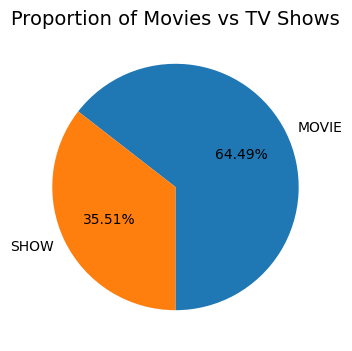

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(type_counts,
    labels=type_counts.index,
    autopct='%1.2f%%',
    startangle=270)

plt.title("Proportion of Movies vs TV Shows", fontsize=14)
plt.show()

The number of movies in Netflix is almost the double of TV-Shows.

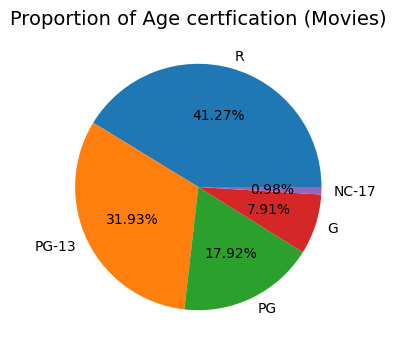

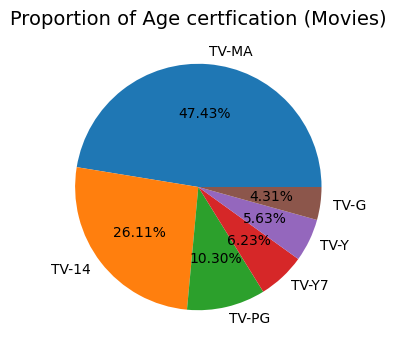

In [143]:
movie_df = df[(df['type']=='MOVIE') & (df['age_certification'] != 'Unknown')]

age_count = movie_df['age_certification'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(age_count,
       labels=age_count.index,
       autopct='%1.2f%%')

plt.title("Proportion of Age certfication (Movies)", fontsize=14)
plt.show()                             # Age Certification proportion of Movies only (Pie).

tv_df = df[(df['type']=='SHOW') & (df['age_certification'] != 'Unknown')]

age_count = tv_df['age_certification'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(age_count,
       labels=age_count.index,
       autopct='%1.2f%%')

plt.title("Proportion of Age certfication (Movies)", fontsize=14)
plt.show()                              # Age Certification proportion for TV-Show only (Pie).

In the case of movies, R rated content is the most available on Netflix.

In the case of TV-Shows, TV-MA is the most available, which is the equivalent of R rating in Movie segment.

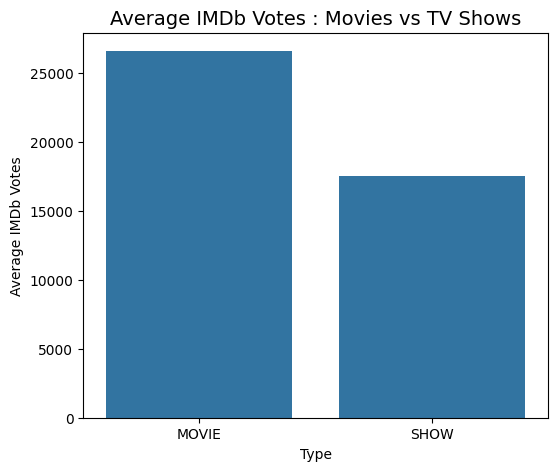

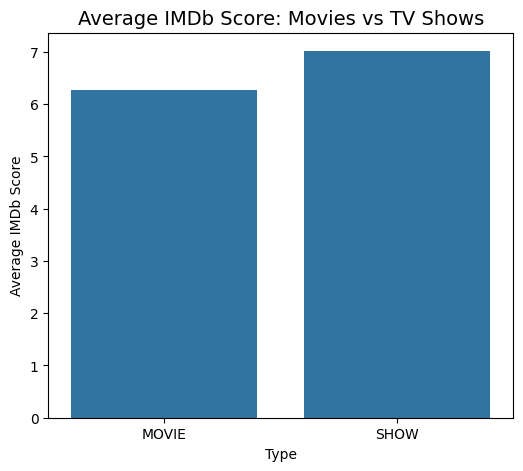

In [144]:
#Avg Votes vs Type

avg_vote_type = df.groupby('type')['imdb_votes'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=avg_vote_type,
    x='type',
    y='imdb_votes')


plt.title("Average IMDb Votes : Movies vs TV Shows", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Average IMDb Votes")
plt.show()

#Avg Score vs Type

avg_score_type = df.groupby('type')['imdb_score'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=avg_score_type,
    x='type',
    y='imdb_score')


plt.title("Average IMDb Score: Movies vs TV Shows", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Average IMDb Score")
plt.show()

Even though Movies have higher votes than Shows, average rating of Shows is higher than Movies.

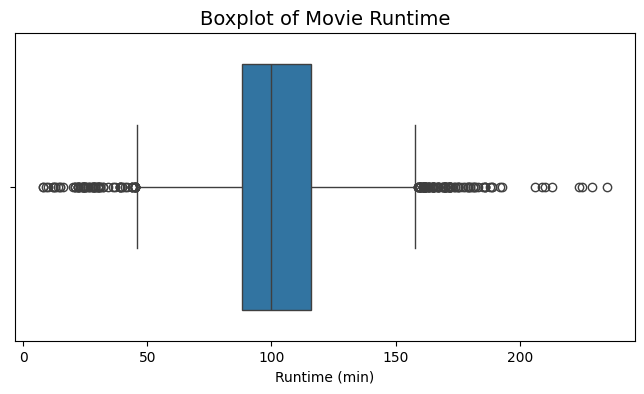

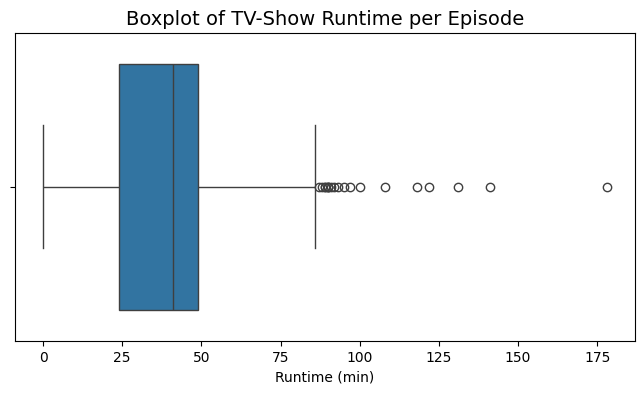

In [110]:
movie_df = df[df['type'] == 'MOVIE']

plt.figure(figsize=(8,4))
sns.boxplot(x=movie_df['runtime'])
plt.title("Boxplot of Movie Runtime", fontsize=14) #Runtime Boxplot of movies
plt.xlabel("Runtime (min)")
plt.show()

tv_df = df[df['type'] == 'SHOW']

plt.figure(figsize=(8,4))
sns.boxplot(x=tv_df['runtime'])
plt.title("Boxplot of TV-Show Runtime per Episode", fontsize=14) #Runtime Boxplot of TV-Shows
plt.xlabel("Runtime (min)")
plt.show()

Movies have a median runtime of 100 minutes.

Shows have a median runtime of around 40 minutes per episode.

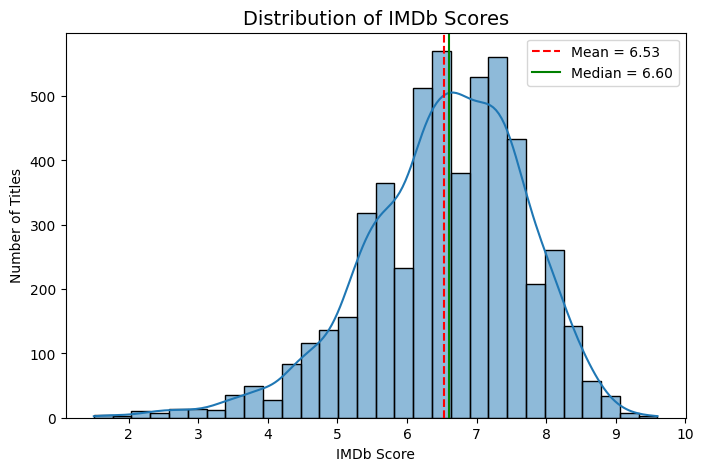

In [109]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=30, kde=True) #IMDB score distribution.

plt.axvline(df['imdb_score'].mean(), color='red', linestyle='--', label=f"Mean = {df['imdb_score'].mean():.2f}")
plt.axvline(df['imdb_score'].median(), color='green', linestyle='-', label=f"Median = {df['imdb_score'].median():.2f}")

plt.title("Distribution of IMDb Scores", fontsize=14)
plt.xlabel("IMDb Score")
plt.ylabel("Number of Titles")
plt.legend()
plt.show()

The Shows and Movies on Netflix have an average rating of 6.53 and median of 6.60. Which indicates that most of the movies and shows are of top quality.

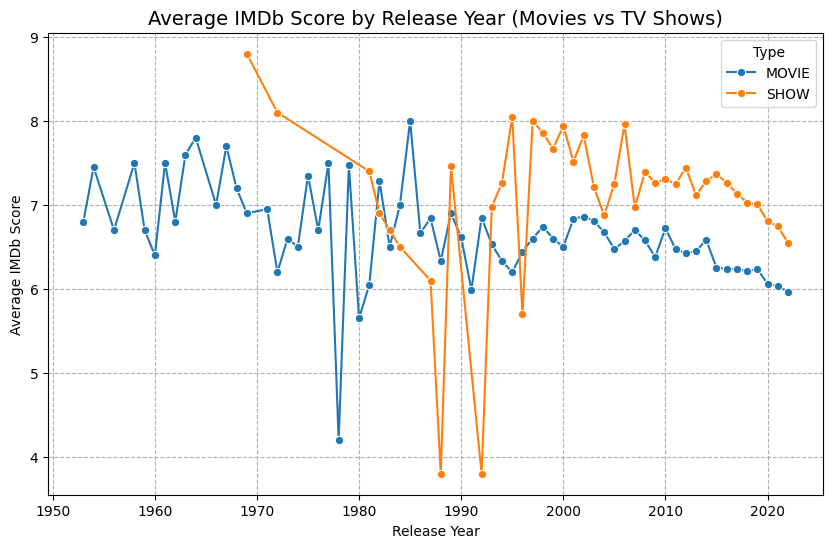

In [108]:
avg_scores_type = df.groupby(['release_year', 'type'])['imdb_score'].mean().reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(data=avg_scores_type,    #Lineplot, score vs release year
    x='release_year',
    y='imdb_score',
    hue='type',
    marker='o')

plt.title("Average IMDb Score by Release Year (Movies vs TV Shows)", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.legend(title="Type")
plt.grid(True, linestyle='--')
plt.show()

Shows that were released in the 1970's tend to have a higher rating and then goes really down in the 1990's. Then the ratings settle to the average value. But after 2010 ratings are seen to be going down.

In the case of movies, the average rating shows consistancy, but like in the case of shows, movies also see a decresing trend in ratings after 2010.

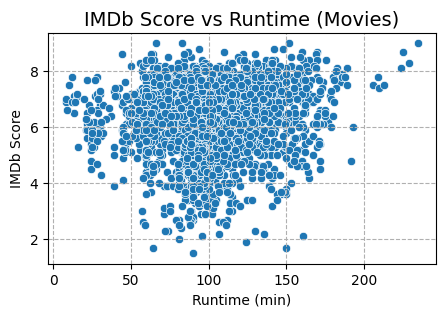

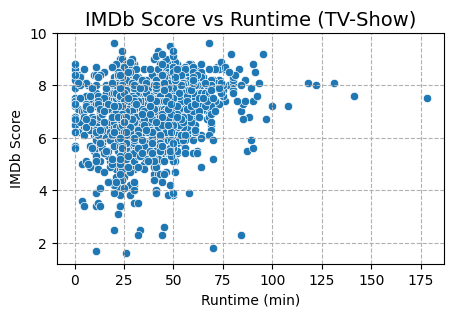

In [106]:
movie_df = df[df['type'] == 'MOVIE']

plt.figure(figsize=(5,3))    #Scatter plot, score vs runtime (movies)
sns.scatterplot(data=movie_df,
    x='runtime',
    y='imdb_score')

plt.title("IMDb Score vs Runtime (Movies)", fontsize=14)
plt.xlabel("Runtime (min)")
plt.ylabel("IMDb Score")
plt.grid(True, linestyle='--')
plt.show()

tv_df = df[df['type'] == 'SHOW']

plt.figure(figsize=(5,3))     # scatter plot, score vs runtime (tv-show)
sns.scatterplot(data=tv_df,
    x='runtime',
    y='imdb_score')

plt.title("IMDb Score vs Runtime (TV-Show)", fontsize=14)
plt.xlabel("Runtime (min)")
plt.ylabel("IMDb Score")
plt.grid(True, linestyle='--')
plt.show()

Movies and shows both have all ratings distributed all over the median runtime zone. But, both plots show that the higher the runtime, the higher the rating.

In the case of movies, we can see that movies will lower runtime also have higher rating.

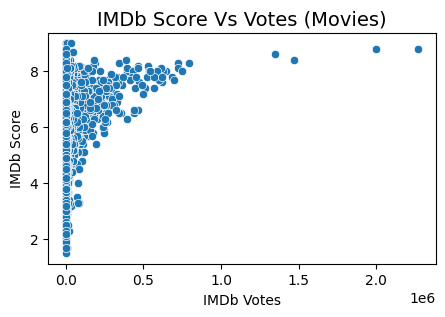

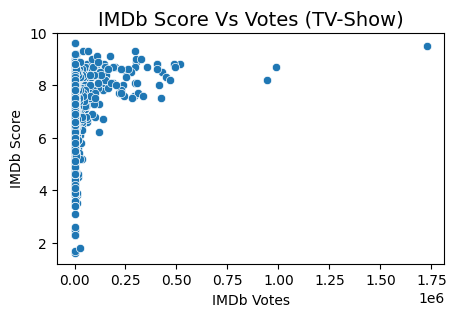

In [115]:
movie_df = df[df['type'] == 'MOVIE']

plt.figure(figsize=(5,3))
sns.scatterplot(data=movie_df,     
    x='imdb_votes',
    y='imdb_score')

plt.title("IMDb Score Vs Votes (Movies)", fontsize=14)
plt.xlabel("IMDb Votes")
plt.ylabel("IMDb Score")
plt.show()

tv_df = df[df['type'] == 'SHOW']

plt.figure(figsize=(5,3))
sns.scatterplot(data=tv_df,     
    x='imdb_votes',
    y='imdb_score')

plt.title("IMDb Score Vs Votes (TV-Show)", fontsize=14)
plt.xlabel("IMDb Votes")
plt.ylabel("IMDb Score")
plt.show()

Both pots illustrate that while it's possible for low-voted titles to have any score, only titles with a high IMDb score can succesfully accumulate a very large number of votes. The score becomes a much more reliable indicator of quality for titles that have been revieved by a massive audience.

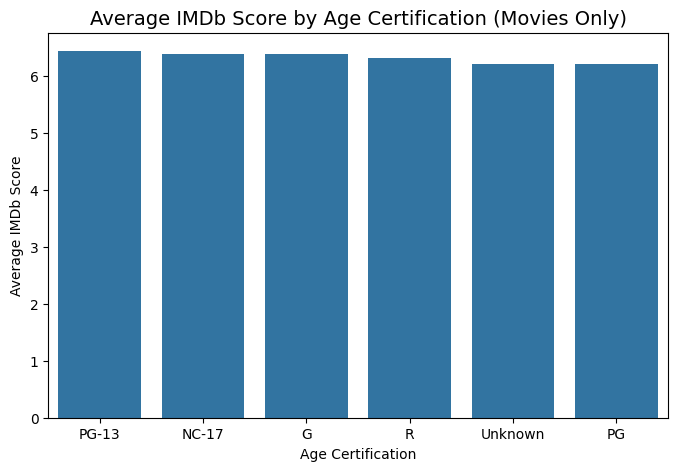

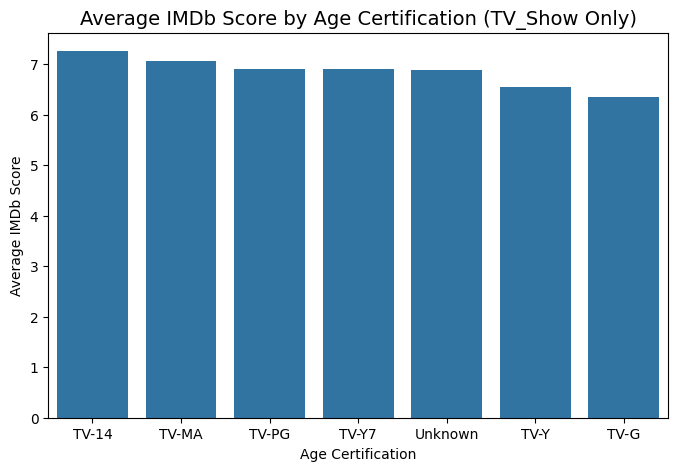

In [130]:
movie_df = df[df['type'] == 'MOVIE']

avg_score_by_cert = (movie_df.groupby('age_certification')['imdb_score'].mean().reset_index()
    .sort_values(by='imdb_score', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=avg_score_by_cert,
    x='age_certification',
    y='imdb_score')

plt.title("Average IMDb Score by Age Certification (Movies Only)", fontsize=14)
plt.xlabel("Age Certification")
plt.ylabel("Average IMDb Score")
plt.show()

tv_df = df[df['type'] == 'SHOW']

avg_score_by_cert = (tv_df.groupby('age_certification')['imdb_score'].mean().reset_index()
                     .sort_values(by='imdb_score', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=avg_score_by_cert,
            x='age_certification',
            y='imdb_score')

plt.title("Average IMDb Score by Age Certification (TV_Show Only)", fontsize=14)
plt.xlabel("Age Certification")
plt.ylabel("Average IMDb Score")
plt.show()

Age certification does not seem to have much of an impact in IMDb scores.

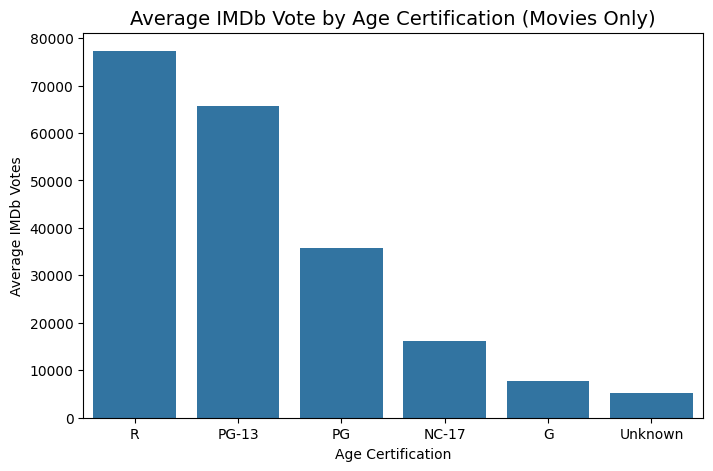

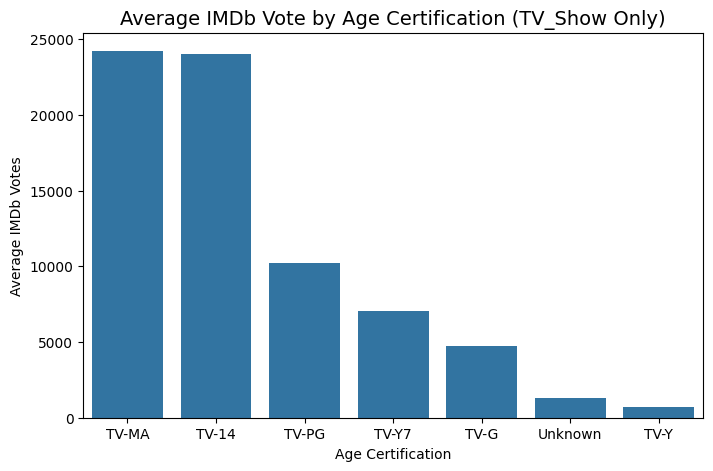

In [135]:
movie_df = df[df['type'] == 'MOVIE']

avg_votes_by_cert = (movie_df.groupby('age_certification')['imdb_votes'].mean().reset_index()
    .sort_values(by='imdb_votes', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=avg_votes_by_cert,
    x='age_certification',
    y='imdb_votes')

plt.title("Average IMDb Vote by Age Certification (Movies Only)", fontsize=14)
plt.xlabel("Age Certification")
plt.ylabel("Average IMDb Votes")
plt.show()

tv_df = df[df['type'] == 'SHOW']

avg_votes_by_cert = (tv_df.groupby('age_certification')['imdb_votes'].mean().reset_index()
                     .sort_values(by='imdb_votes', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=avg_votes_by_cert,
            x='age_certification',
            y='imdb_votes')

plt.title("Average IMDb Vote by Age Certification (TV_Show Only)", fontsize=14)
plt.xlabel("Age Certification")
plt.ylabel("Average IMDb Votes")
plt.show()

Higher age ratings have significantly high votes indicating higer viewership for R rated movies and TV-MA rated shows, which are also the most available certifications on Netflix.

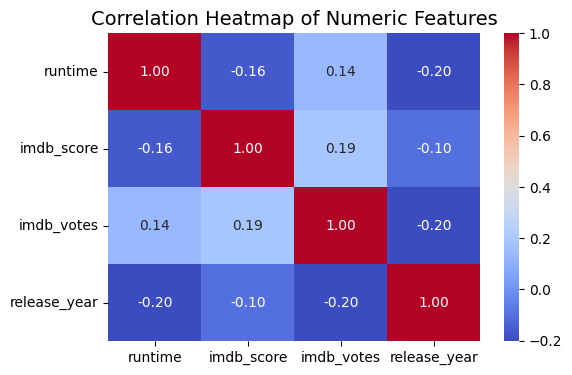

In [148]:
num_cols = ['runtime', 'imdb_score', 'imdb_votes', 'release_year']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr,
    annot=True,                   
    fmt=".2f",
    cmap='coolwarm')

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


The Heatmap indicates that none of the pairs of numeric features have a string linear correlation. This means that predicting one variable based on a linear model of another would likely be inaccurate.

### Overall Summary and Findings ###

The analysis provides a comprehensive view of Netflix’s content distribution, audience engagement, and quality trends. It reveals that movies dominate Netflix’s catalogue, roughly twice the number of TV shows, yet both categories show similar audience behaviour patterns. The most prevalent age ratings, R for movies and TV-MA for shows, highlight Netflix’s focus on mature audiences.

While movies receive higher total votes, TV shows maintain a slightly better average IMDb rating, suggesting that shows may provide more consistent viewer satisfaction. Runtime analysis indicates that movies typically last around 100 minutes, whereas TV episodes average around 40 minutes, aligning with standard entertainment norms.

The average IMDb rating of 6.53 (median 6.6) suggests that Netflix hosts a substantial amount of quality content, though not necessarily exceptional across the board. Temporal trends show that both movies and shows have experienced a gradual decline in ratings post-2010, possibly due to content saturation or shifting audience expectations.

Correlation and scatter plots indicate that runtime and ratings have weak but positive relationships, implying that longer content tends to perform slightly better. Similarly, titles with higher IMDb ratings attract significantly more votes, showing that audience engagement tends to concentrate around critically well-received content. Finally, the heatmap analysis confirms the absence of strong linear relationships among numeric variables, suggesting that more complex models would be needed for predictive tasks.


### Recomendations/ Next Step ###

1. **Deeper Content Quality Analysis :** Explore genre-wise or director-based patterns to identify which types of content consistently achieve high ratings.
2. **Time-Based Trend Analysis :** Investigate whether the drop in ratings post-2010 correlates with the rise of original Netflix productions or increased global competition.
3. **Sentiment Analysis :** Integrate user review text data to gain deeper insight into why certain titles perform better.
4. **Predictive Modeling :**  Use machine learning to predict IMDb scores or audience engagement based on features like runtime, release year, and genre.
5. **Audience Segmentation :**  Study viewership demographics to identify which audience groups prefer specific genres, ratings, or runtimes.
6. **Platform Strategy Insights :**  Given the popularity of R-rated and TV-MA content, Netflix could further leverage mature genres but also focus on balancing family-friendly or critically acclaimed shows to improve rating trends.